https://habr.com/ru/post/267401/



In [ ]:
using Plots, FFTW
plot(sin)

In [66]:
function wavesolut(;
        a = 1,               # speed of wave propagation
        n = 128,              # number of points
        h = 0.001,            # temporal step
        times = 200         # number of iterations in time
    )
    times * n * n > 10e7 && error("out of mem!") 
    
    dx = 2pi/n         # space step
    X = [0:dx:2pi-dx;]
    Y = copy(X)
    
    k0 = fftshift([-n/2:1:n/2-1;])'
    k1 = repeat(k0, n)
    k2 = rotr90(k1)
    ks = k1.^2 + k2.^2
    
    fun(x,y) = exp(-2((x-pi).^2 + (y-pi).^2))
    u0 = [fun(x,y) for x in X, y in Y]  # profile of initial velocity u 
    ut0 = zeros(n,n)                 # profile of initial acceleration ut
    
    u = zeros(times,n,n)  # stores velocity profile for every time steps
    u[1,:,:] .= u0
    
    uf = fft(u0)
    uft = fft(ut0)
    
    for i=2:times
        uft_new = uft - a*h*ks.*uf
        uf = uf + 0.5h*(uft + uft_new)
        uft = uft_new
"""
        #fixed boundary conditions 
        u0 = real.(ifft(uf))
        u0[1,:] = 0; u0[end,:] = 0
        u0[:,1] = 0; u0[:,end] = 0
        uf = fft2(u0)
"""
        u[i,:,:] .= real.(ifft(uf))
    end
    
    return X, Y, u
end

wavesolut (generic function with 5 methods)

In [94]:
@time x, y, u = wavesolut(a = 2.5, n = 256, h = 0.001, times = 1400);

  8.767365 seconds (107.88 k allocations: 9.577 GiB, 12.71% gc time)


In [91]:
sizeof(u)/2^20

700.0

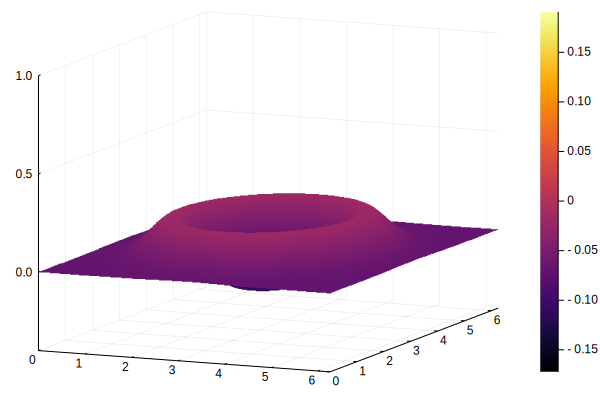

In [95]:
surface(x, y, u[1000,:,:], zaxis=( (-0.4, 1), -1:0.5:1) )

In [17]:
cd("C:\\Users\\User\\Desktop\\Mycop\\plots")

In [98]:
for i in 1:28:size(u, 1)
    surface(x, y, u[i,:,:], zaxis=( (-0.4, 1), -1:0.5:1) )
    savefig("plot$i.png")
end